In [122]:
import pandas as pd
import scipy.io
import os
import mne

In [123]:
data = os.path.dirname("./data/")
data_files = os.listdir(data)

In [124]:
# files_5f = [file for file in data_files if "5F" in file]
files_NoMT = [file for file in data_files if "NoMT" in file]
# files_HaLT = [file for file in data_files if "HaLT" in file]
files_FREEFORM = [file for file in data_files if "FREEFORM" in file]
# files_CLA = [file for file in data_files if ("CLA" in file) and (not "SubjectJ" in file)]
# files_CLA_SubjectJ = [file for file in data_files if "CLA-" in file]

In [125]:
mat = scipy.io.loadmat(os.path.join(data, files_NoMT[0]))

In [126]:
for key in mat:
    print(key)

__header__
__version__
__globals__
o


In [127]:
mat["o"][0][0][0]  #marker

array(['201604221523.D091BB44'], dtype='<U21')

In [128]:
mat["o"][0][0][1]  #Data

array(['NK-data import (auto)'], dtype='<U21')

In [129]:
mat["o"][0][0][2]  #Hz of the signals (sampFreq)

array([[200]], dtype=uint8)

In [130]:
mat["o"][0][0][3]  #Number of samples

array([[664400]])

In [131]:
mat["o"][0][0][4]  #len 718600

# Values from 0 to 99, state of the eGUI

# The marker codes from 1 to 6 encode the visual stimuli directing the participants to implement given mental
# imageries in the order 

# CLA, HaLT, and FreeForm recording sessions.
# 1: “left hand,” 2: “right hand,” 3: “passive or neutral,” 4: “left leg,” 5: “tongue,” and 6:“right leg”

# For 5 F recording sessions, the codes are 
# 1: “thumb,” 2: “index finger,” 3: “middle finger,” 4: “ring finger,” and 5: “pinkie finger”

# Codes greater than 10 indicate service periods including 
# 99: “initial relaxation,” 91: “inter-session breaks,” 92: “experiment end.” Code “0” means “blank” or nothing is displayed in eGUI

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [132]:
mat["o"][0][0][5]  #(718600, 22)

# each column is the time-series of voltage measurements
# from a single EEG input lead such as F3 or C3


array([[ -0.  ,  -0.  ,  -0.  , ...,  -0.  ,  -0.  ,  -0.  ],
       [ -0.  ,  -0.  ,  -0.  , ...,  -0.  ,  -0.  ,  -0.  ],
       [ -0.  ,  -0.  ,  -0.  , ...,  -0.  ,  -0.  ,  -0.  ],
       ...,
       [-26.72, -24.98, -16.28, ...,  -6.11,  17.88, -11.86],
       [-38.43, -35.16, -24.71, ..., -12.61,  12.62, -10.64],
       [-24.91, -22.64,  -5.6 , ...,   0.97,  26.97, -10.31]])

In [133]:
mat["o"][0][0][6]

array([[array(['Fp1'], dtype='<U3')],
       [array(['Fp2'], dtype='<U3')],
       [array(['F3'], dtype='<U2')],
       [array(['F4'], dtype='<U2')],
       [array(['C3'], dtype='<U2')],
       [array(['C4'], dtype='<U2')],
       [array(['P3'], dtype='<U2')],
       [array(['P4'], dtype='<U2')],
       [array(['O1'], dtype='<U2')],
       [array(['O2'], dtype='<U2')],
       [array(['A1'], dtype='<U2')],
       [array(['A2'], dtype='<U2')],
       [array(['F7'], dtype='<U2')],
       [array(['F8'], dtype='<U2')],
       [array(['T3'], dtype='<U2')],
       [array(['T4'], dtype='<U2')],
       [array(['T5'], dtype='<U2')],
       [array(['T6'], dtype='<U2')],
       [array(['Fz'], dtype='<U2')],
       [array(['Cz'], dtype='<U2')],
       [array(['Pz'], dtype='<U2')],
       [array(['X5'], dtype='<U2')]], dtype=object)

In [134]:
sampling_freq = mat["o"][0][0][2][0][0]  #Hz of the signals (sampFreq)

In [135]:
n_samples = mat["o"][0][0][3][0][0]

In [136]:
ch_names = [element[0][0] for element in mat["o"][0][0][6]]

In [138]:
data = mat["o"][0][0][5]

In [139]:
mat["o"][0][0][4]


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

In [140]:
df = pd.DataFrame(mat["o"][0][0][5], columns=ch_names)
df["State_eGUI"] = mat["o"][0][0][4]
df

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,State_eGUI
0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0
1,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0
2,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0
3,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0
4,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664395,-15.43,-17.92,-4.51,-6.95,6.61,-7.80,9.05,5.26,10.68,6.48,...,-3.58,7.99,12.88,7.59,-0.31,-14.72,-1.35,22.09,-13.05,0
664396,-33.25,-28.39,-17.48,-16.19,-3.19,0.87,1.61,-0.69,1.72,-1.53,...,-15.19,-5.49,-8.18,-1.70,-9.12,-26.84,-7.27,16.24,-12.42,0
664397,-26.72,-24.98,-16.28,-8.36,-1.30,0.73,0.71,-0.20,2.75,2.29,...,-9.01,-8.90,0.81,-1.39,-4.54,-23.03,-6.11,17.88,-11.86,0
664398,-38.43,-35.16,-24.71,-19.55,-7.39,6.05,-5.85,-2.92,-2.95,-1.85,...,-20.20,-2.05,-13.13,-8.32,-10.93,-30.80,-12.61,12.62,-10.64,0


<AxesSubplot:>

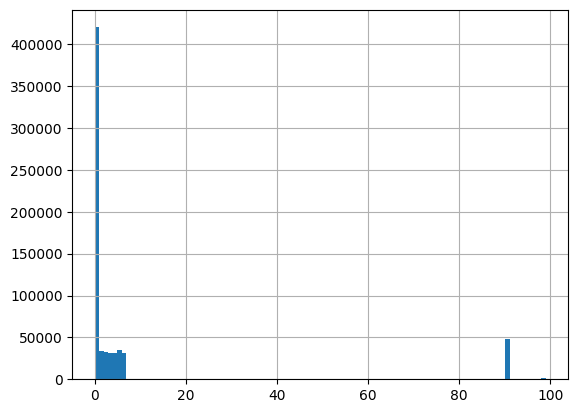

In [141]:
df["State_eGUI"].hist(bins=100)

In [142]:
df = df[df["State_eGUI"] == 0]
df = df.drop(columns=["State_eGUI", "X5"])
df = df.T
ch_names.remove("X5")
ch_types = ['eeg'] * 21

In [152]:
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)

In [153]:
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, A1, A2, F7, F8, T3, ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 21
 projs: []
 sfreq: 200.0 Hz
>


In [154]:
raw_data = mne.io.RawArray(df.to_numpy(), info)

Creating RawArray with float64 data, n_channels=21, n_times=420231
    Range : 0 ... 420230 =      0.000 ...  2101.150 secs
Ready.


In [155]:
from mne.channels import make_standard_montage

montage = make_standard_montage(
    "standard_prefixed"
)  # To load the standard electrodes map for plotting ICA components

In [156]:
mne.channels.get_builtin_montages()

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (33.005 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished


Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 21 components
Fitting ICA took 8.4s.


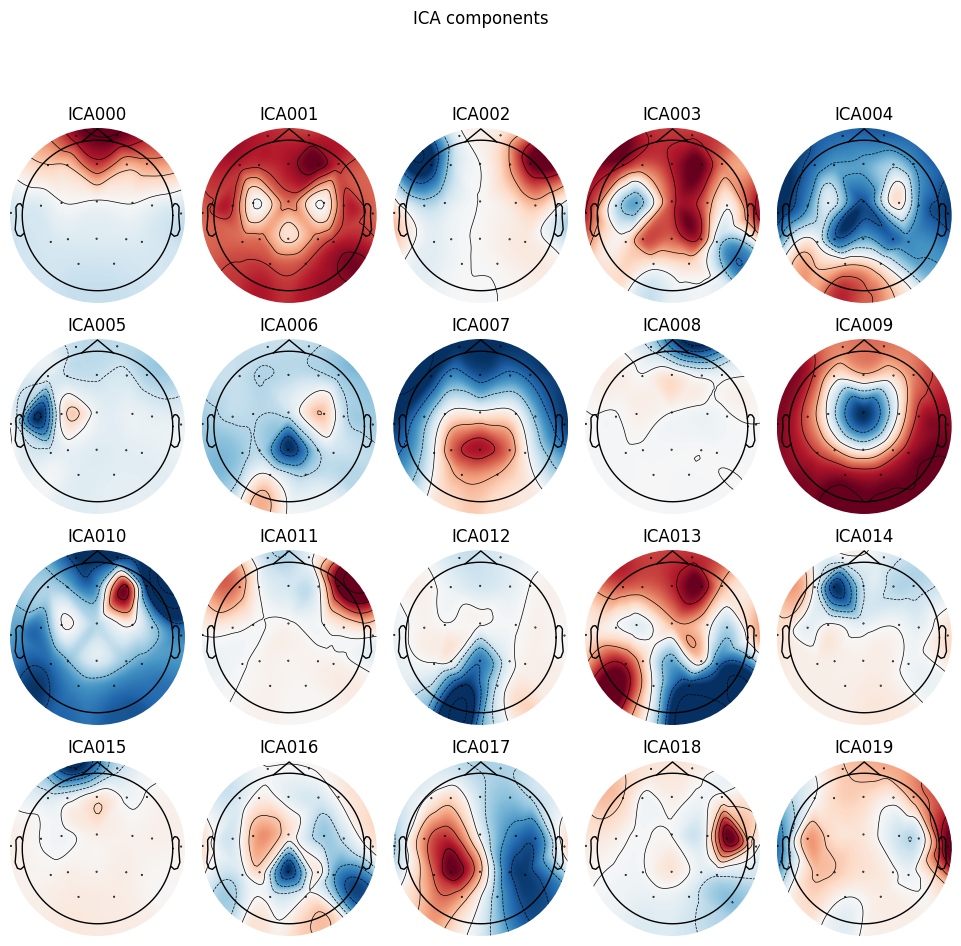

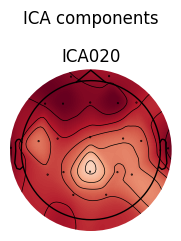

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 195x260.5 with 1 Axes>]

In [160]:
def FIR_zero_phase_filter_func(raw_object):
    return raw_object.load_data().filter(0.1, 30, method="fir", phase="zero")

raw_data = FIR_zero_phase_filter_func(raw_data)

raw_data.set_montage(montage)

ica_obj = mne.preprocessing.ICA(n_components=21, random_state=36)

ica_obj.fit(raw_data)

ica_obj.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1050 matching events found
No baseline correction applied
0 projection items activated


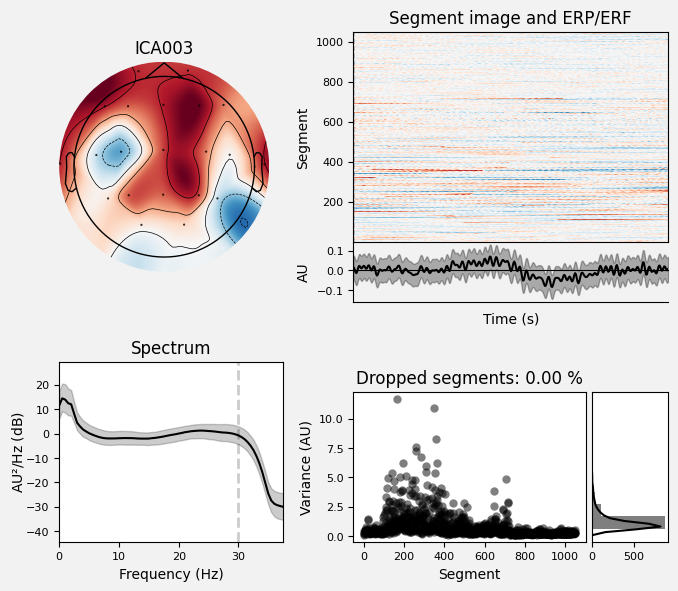

[<Figure size 700x600 with 6 Axes>]

In [164]:
ica_obj.plot_properties(raw_data, picks=3)

In [ ]:
# ica_obj.exclude = [0, 1, 2, 3, 4, 5]

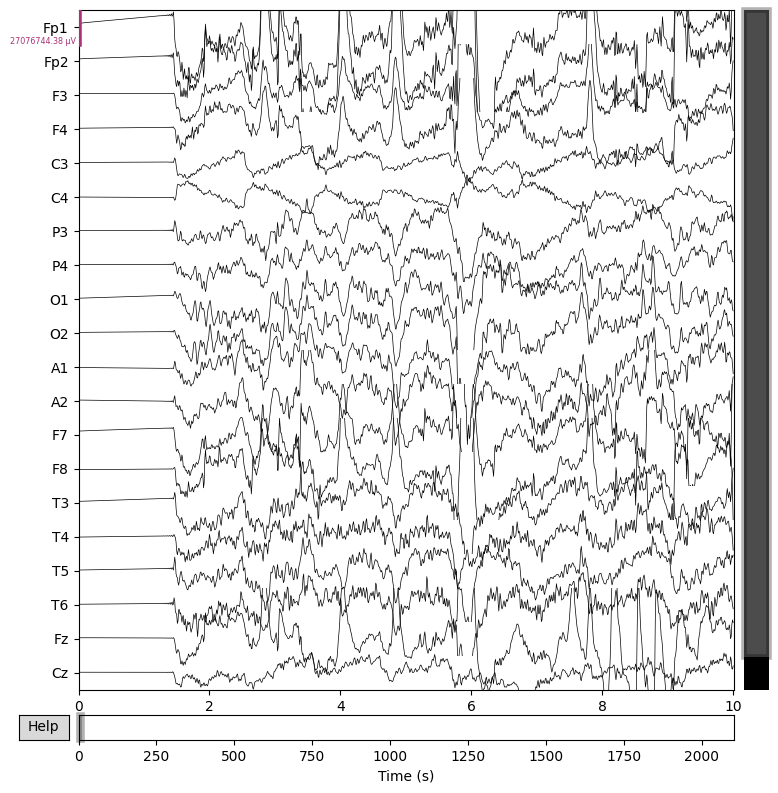

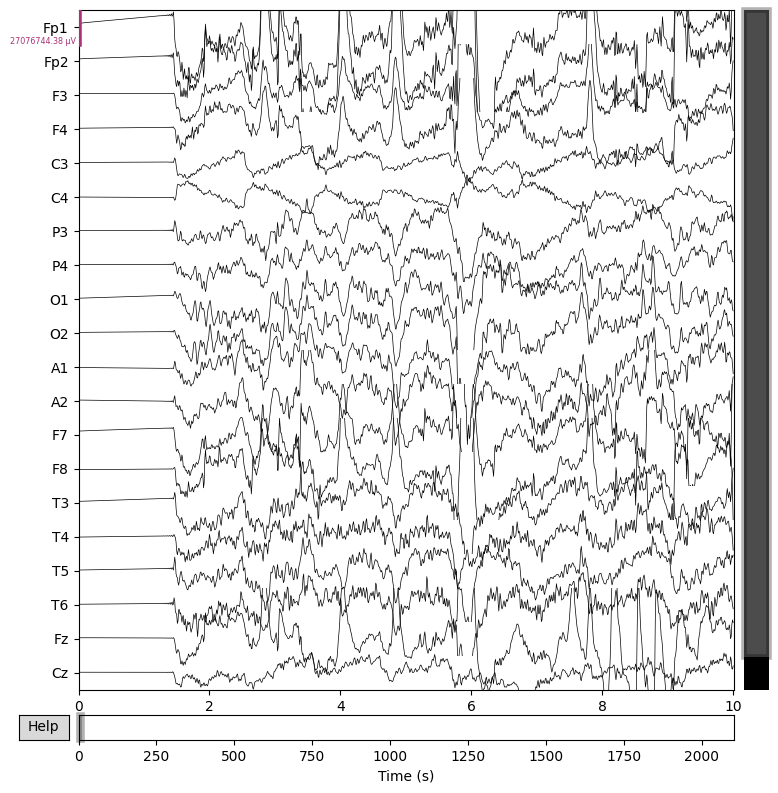

In [179]:
raw_data.plot(scalings="auto")

Applying ICA to Raw instance
    Transforming to ICA space (21 components)
    Zeroing out 0 ICA components
    Projecting back using 21 PCA components


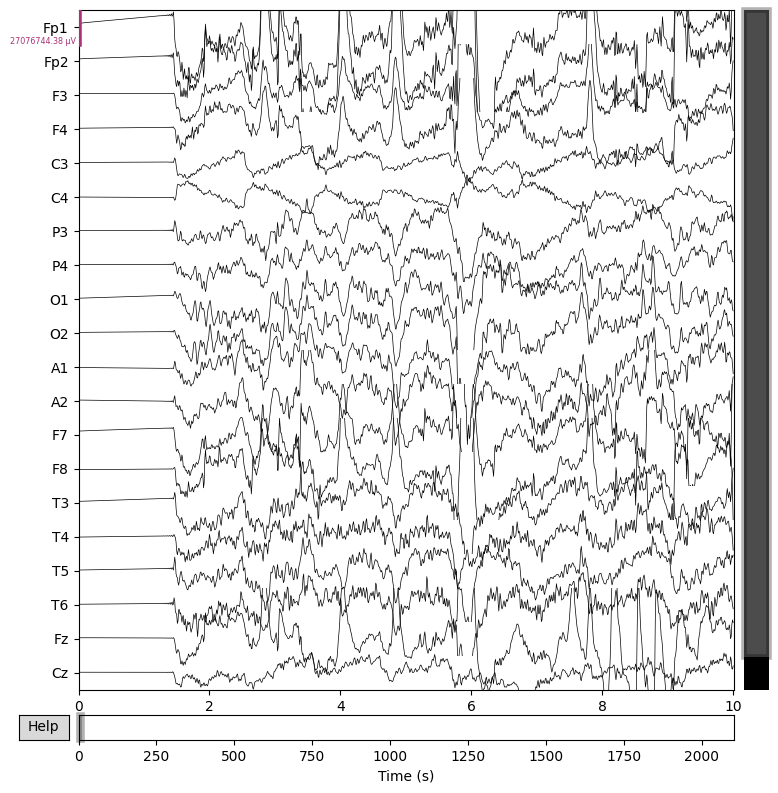

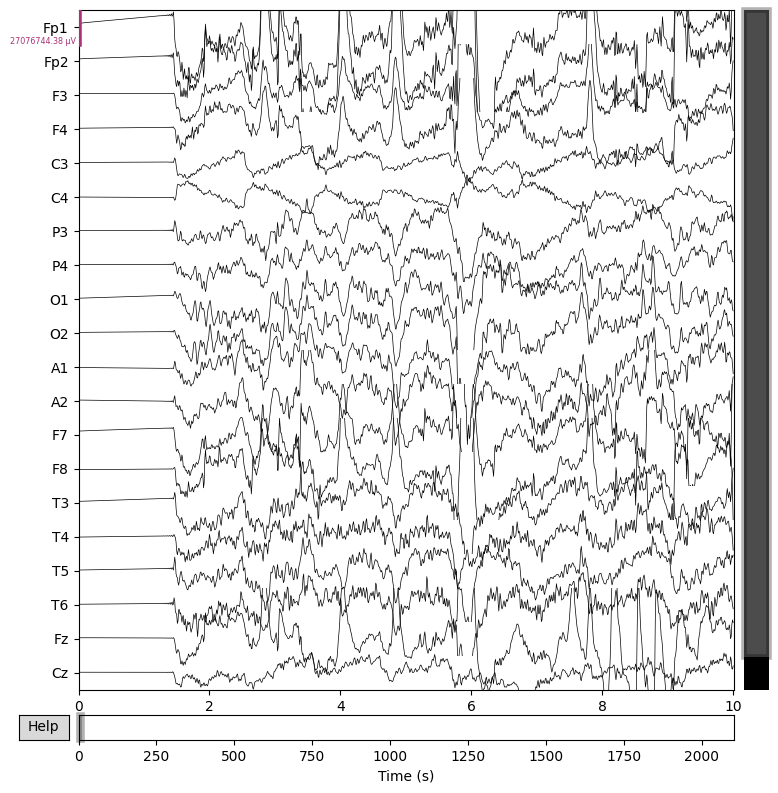

In [180]:
eeg_ica = raw_data.copy()
eeg_ica.load_data()
ica_obj.apply(eeg_ica)
eeg_ica.plot(scalings="auto")

In [181]:
def average_reference_func(raw):
    return raw.load_data().set_eeg_reference(ref_channels='average')
eeg_ica = average_reference_func(eeg_ica)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
